In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:23<00:00, 171MB/s]
100% 2.29G/2.29G [00:23<00:00, 107MB/s]


In [ ]:
import zipfile
zip= zipfile.ZipFile("/content/chest-xray-pneumonia.zip","r")
zip.extractall("/content")
zip.close()

# **IMPORTS**

In [ ]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dir_path="/content/chest_xray/chest_xray"

In [ ]:
train_p = "/content/chest_xray/chest_xray/train"
test_p ="/content/chest_xray/chest_xray/test"
val_p = "/content/chest_xray/chest_xray/val"

In [ ]:
''' Data Augmentation '''
train_ds = ImageDataGenerator(rescale =1/255, shear_range=10, zoom_range = 0.2, horizontal_flip = True, 
                              width_shift_range=0.2, fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
train_ds = train_ds.flow_from_directory(train_p, target_size=(150,150), batch_size= 16, class_mode='binary')

val_ds = val_datagen.flow_from_directory(val_p, target_size=(150,150),batch_size=8, class_mode='binary')

tes_ds = val_datagen.flow_from_directory(test_p, target_size=(150,150), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## IMPORT THE VGG MODEL

In [ ]:
from keras.layers import Dense,Conv2D,GlobalAveragePooling2D,Flatten,Input
from keras.models import Model

In [ ]:
model1 = VGG16(include_top = False,weights='imagenet')

''' freezing layers '''
for i in model1.layers:
    i.trainable=False
    
out = model1.output

''' GlobalAveragePooling Layer '''
out = keras.layers.GlobalAveragePooling2D()(out)
out = keras.layers.Dense(128, activation='relu')(out)

''' Classification Layer '''
pred = keras.layers.Dense(1, activation='sigmoid')(out)

''' final model '''
model= keras.Model(model1.input, pred)

lr = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(lr, decay_steps=100000, decay_rate=0.96, staircase=True)

''' Compile the model '''
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr_schedule), metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, steps_per_epoch = 100, epochs=20, validation_data=val_ds)

Epoch 1/20
100/100 [==============================] - 393s 4s/step - loss: 0.6926 - accuracy: 0.7563 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 2/20
100/100 [==============================] - 398s 4s/step - loss: 0.4137 - accuracy: 0.8344 - val_loss: 0.2910 - val_accuracy: 0.8750
Epoch 3/20
100/100 [==============================] - 386s 4s/step - loss: 0.4399 - accuracy: 0.8431 - val_loss: 0.5270 - val_accuracy: 0.7500
Epoch 4/20
100/100 [==============================] - 386s 4s/step - loss: 0.2800 - accuracy: 0.8850 - val_loss: 0.5995 - val_accuracy: 0.7500
Epoch 5/20
100/100 [==============================] - 386s 4s/step - loss: 0.3167 - accuracy: 0.8756 - val_loss: 0.3302 - val_accuracy: 0.9375
Epoch 6/20
100/100 [==============================] - 382s 4s/step - loss: 0.2497 - accuracy: 0.8963 - val_loss: 0.2555 - val_accuracy: 0.8750
Epoch 7/20
100/100 [==============================] - 384s 4s/step - loss: 0.2364 - accuracy: 0.9062 - val_loss: 0.3686 - val_accuracy: 0.8125

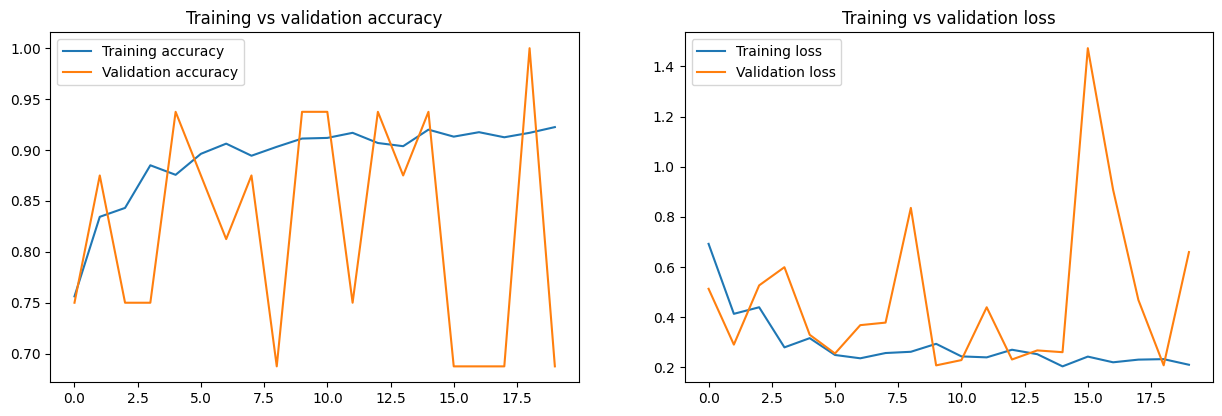

In [ ]:
''' Training Accuracy and Validaion Accuracy graph '''
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label = "Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

''' Training Loss and Validation Loss graph '''
plt.subplot(2,2,2)
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()